In [1]:
import pandas as pd

In [2]:
skimsTransitCrowding = pd.read_csv('1.String _ skimsTransitCrowding.csv.gz')

In [3]:
overloadedMode = skimsTransitCrowding[skimsTransitCrowding['capacity'] <= skimsTransitCrowding['numberOfPassengers']]

In [5]:
overloadedMode['firstTwo'] = overloadedMode['vehicleId'].str[:2]

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_14754/4091636193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overloadedMode['firstTwo'] = overloadedMode['vehicleId'].str[:2]


In [6]:
overloadedMode[overloadedMode['firstTwo'] == 'SF']
## The 77 here is actually TRAM-DEFAULT

,vehicleId,fromStopIdx,numberOfPassengers,capacity,observations,iterations,firstTwo
13,SF:7628772,1,22,22,1,1,SF
1176,SF:7631663,2,22,22,1,1,SF
3746,SF:7631636,0,22,22,1,1,SF
6241,SF:7628514,0,22,22,1,1,SF
7401,SF:7631639,1,22,22,1,1,SF
11416,SF:7628639,1,22,22,1,1,SF
11799,SF:7628667,0,22,22,1,1,SF
11906,SF:7631638,2,22,22,1,1,SF
12297,SF:7631633,0,22,22,1,1,SF
13535,SF:7631635,0,22,22,1,1,SF


In [7]:
overloadedMode.groupby('firstTwo').count()

# it's causing more denied trips -- 37% vs 24% before, VTA caused the denied trips for both BA and Tram, how many 
# boardings we should have VTA?

,vehicleId,fromStopIdx,numberOfPassengers,capacity,observations,iterations
firstTwo,,,,,,
BA,111,111,111,111,111,111
SF,48,48,48,48,48,48
VT,72,72,72,72,72,72


In [10]:
events = pd.read_csv('1.events.csv.gz')

/usr/local/Cellar/jupyterlab/3.2.5/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,4,18,20,21,22,23,24,25,31,33,34,35,36,43,45,47,49,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
events['type'].unique()

array(['departure', 'PersonEntersVehicle', 'PathTraversal', 'ModeChoice',
       'actend', 'LeavingParkingEvent', 'PersonLeavesVehicle', 'arrival',
       'actstart', 'ReserveRideHail', 'ParkingEvent', 'PersonCost',
       'Replanning', 'ChargingPlugInEvent', 'RefuelSessionEvent',
       'ChargingPlugOutEvent'], dtype=object)

In [12]:
pathTraversal = events[events['type'] == 'PathTraversal'].dropna(how='all', axis=1)

In [13]:
pathTraversal

,vehicle,time,type,riders,toStopIndex,fromStopIndex,seatingCapacity,tollPaid,secondaryFuelLevel,primaryFuelLevel,...,secondaryFuel,secondaryFuelType,primaryFuelType,mode,driver,vehicleType,links,numPassengers,length,primaryFuel
85480,MA:5323312,42.0,PathTraversal,NaN,NaN,NaN,12.0,0.0,0.0,2.999191e+10,...,0.0,None,Gasoline,bus,TransitDriverAgent-MA:5323312,BUS-MA,"20393,134727,134715,17955,17951,132987,17949,7...",0.0,653.352,8.088759e+06
85481,MA:5348932,42.0,PathTraversal,NaN,NaN,NaN,12.0,0.0,0.0,2.999191e+10,...,0.0,None,Gasoline,bus,TransitDriverAgent-MA:5348932,BUS-MA,"20393,134727,134715,17955,17951,132987,17949,7...",0.0,653.352,8.088759e+06
149932,MA:5348932,300.0,PathTraversal,NaN,NaN,NaN,12.0,0.0,0.0,2.996823e+10,...,0.0,None,Gasoline,bus,TransitDriverAgent-MA:5348932,BUS-MA,"20389,16787,15697,15698,35152,35151,133091",0.0,1912.970,2.368333e+07
149933,MA:5323312,300.0,PathTraversal,NaN,NaN,NaN,12.0,0.0,0.0,2.996823e+10,...,0.0,None,Gasoline,bus,TransitDriverAgent-MA:5323312,BUS-MA,"20389,16787,15697,15698,35152,35151,133091",0.0,1912.970,2.368333e+07
149934,MA:5348932,660.0,PathTraversal,NaN,NaN,NaN,12.0,0.0,0.0,2.996339e+10,...,0.0,None,Gasoline,bus,TransitDriverAgent-MA:5348932,BUS-MA,"133091,133087,21883,21448,133066,21450",0.0,390.593,4.835698e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86125163,3808380,108006.0,PathTraversal,NaN,NaN,NaN,3.0,0.0,0.0,3.310185e+09,...,0.0,None,Gasoline,car,3115532,conv-L1-0-to-50000-LowTech-2035-Car-ICEV_Gasoline,"17949,17569",0.0,4874.956,7.036349e+06
86125164,2151728,108006.0,PathTraversal,NaN,NaN,NaN,3.0,0.0,0.0,3.401538e+09,...,0.0,None,Gasoline,car,4654473,sharedVehicle-sharedCar,"14217,14211,14209,42288",0.0,6565.457,9.124949e+06
86125167,2395866,108006.0,PathTraversal,NaN,NaN,NaN,3.0,0.0,0.0,3.436510e+09,...,0.0,None,Gasoline,car,1128243,conv-L1-10000-to-25000-LowTech-2019,"68224,68227,66329",0.0,568.894,9.554747e+05
86125195,SF:7676413,108007.0,PathTraversal,NaN,NaN,NaN,13.0,0.0,0.0,2.976542e+10,...,0.0,None,Diesel,bus,TransitDriverAgent-SF:7676413,BUS-DEFAULT,"142935,18069,80678,142930,142926",0.0,355.521,7.127485e+06


In [14]:
pathTraversalInOverloaded = pathTraversal[pathTraversal['vehicle'].isin(overloadedMode['vehicleId'])]

In [34]:
events['type'].unique()

array(['departure', 'PersonEntersVehicle', 'PathTraversal', 'ModeChoice',
       'actend', 'LeavingParkingEvent', 'PersonLeavesVehicle', 'arrival',
       'actstart', 'ReserveRideHail', 'ParkingEvent', 'PersonCost',
       'Replanning', 'ChargingPlugInEvent', 'RefuelSessionEvent',
       'ChargingPlugOutEvent'], dtype=object)

In [ ]:
PersonEntersVehicle

In [11]:
pathTraversalInOverloaded['firstTwoOfVehicle'] = pathTraversalInOverloaded['vehicle'].str[:2]

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/523607190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pathTraversalInOverloaded['firstTwoOfVehicle'] = pathTraversalInOverloaded['vehicle'].str[:2]


In [12]:
pathTraversalInOverloadedSF = pathTraversalInOverloaded[pathTraversalInOverloaded['firstTwoOfVehicle'] == 'SF']

In [13]:
pathTraversalInOverloadedSF['mode'].unique()

array(['tram', 'cable_car'], dtype=object)

In [14]:
transitPathTraversal = pathTraversal[(pathTraversal['mode'] == 'cable_car') 
             | (pathTraversal['mode'] == 'rail')
             | (pathTraversal['mode'] == 'tram')
             | (pathTraversal['mode'] == 'subway')
             | (pathTraversal['mode'] == 'bus')]

In [15]:
transitPathTraversal.dropna(how='all', axis=1)

,time,type,vehicle,primaryFuelLevel,secondaryFuelLevel,startX,startY,endX,endY,mode,...,fromStopIndex,seatingCapacity,tollPaid,capacity,arrivalTime,departureTime,linkTravelTime,secondaryFuel,secondaryFuelType,primaryFuelType
85480,42.0,PathTraversal,MA:5323312,2.999191e+10,0.0,-122.523285,37.971152,-122.521178,37.970484,bus,...,NaN,34.0,0.0,48.0,42.0,0.0,"10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,1...",0.0,None,Gasoline
85481,42.0,PathTraversal,MA:5348932,2.999191e+10,0.0,-122.523285,37.971152,-122.521178,37.970484,bus,...,NaN,34.0,0.0,48.0,42.0,0.0,"10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,1...",0.0,None,Gasoline
149932,300.0,PathTraversal,MA:5348932,2.996823e+10,0.0,-122.519962,37.970356,-122.504420,37.960708,bus,...,NaN,34.0,0.0,48.0,300.0,42.0,"29.0,29.0,29.0,29.0,29.0,29.0,0.0",0.0,None,Gasoline
149933,300.0,PathTraversal,MA:5323312,2.996823e+10,0.0,-122.519962,37.970356,-122.504420,37.960708,bus,...,NaN,34.0,0.0,48.0,300.0,42.0,"29.0,29.0,29.0,29.0,29.0,29.0,0.0",0.0,None,Gasoline
149934,660.0,PathTraversal,MA:5323312,2.996339e+10,0.0,-122.504851,37.960569,-122.502075,37.962832,bus,...,NaN,34.0,0.0,48.0,660.0,300.0,"16.2,16.2,16.2,16.2,16.2,-3.552713678800501E-15",0.0,None,Gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86423447,107947.0,PathTraversal,SF:7633338,2.952931e+10,0.0,-122.388074,37.755064,-122.387587,37.749016,bus,...,NaN,37.0,0.0,57.0,107947.0,107881.0,"17.333333333333332,17.333333333333332,17.33333...",0.0,None,Diesel
86423497,107992.0,PathTraversal,SF:7633339,2.921536e+10,0.0,-122.466118,37.728457,-122.469138,37.729846,bus,...,NaN,37.0,0.0,57.0,107992.0,107956.0,"40.5,40.5,0.0",0.0,None,Diesel
86423530,107968.0,PathTraversal,SF:7600910,2.997973e+10,0.0,-122.388632,37.760763,-122.393221,37.762778,bus,...,NaN,37.0,0.0,57.0,107968.0,107924.0,"17.90909090909091,17.90909090909091,17.9090909...",0.0,None,Diesel
86423552,107986.0,PathTraversal,SF:7633338,2.951987e+10,0.0,-122.387595,37.749093,-122.386126,37.745757,bus,...,NaN,37.0,0.0,57.0,107986.0,107947.0,"17.0,17.0,17.0,17.0,17.0,0.0",0.0,None,Diesel


In [16]:
transitPathTraversal = transitPathTraversal[transitPathTraversal['time'] <= 86400]

In [17]:
transitPathTraversal['hour'] = transitPathTraversal['time'] / 3600

In [18]:
transitPathTraversal['hour'] = transitPathTraversal['hour'].astype(int)

In [19]:
hourlytransitPathTraversal = transitPathTraversal.groupby(['hour', 'mode']).sum()

In [20]:
hourlytransitPathTraversal.reset_index(inplace=True)

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/3010593114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus['rate'] = bus['numPassengers']/ bus['numPassengers'].sum()


<AxesSubplot:title={'center':'bus'}>

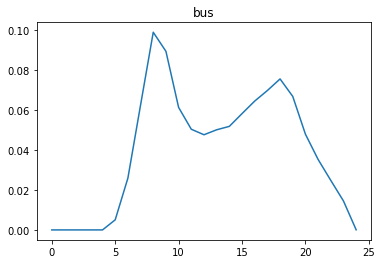

In [21]:
bus = hourlytransitPathTraversal[hourlytransitPathTraversal['mode'] == 'bus']
bus.reset_index(inplace=True)
bus['rate'] = bus['numPassengers']/ bus['numPassengers'].sum()
bus['rate'].plot(title='bus')

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/4252830194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cable_car['rate'] = cable_car['numPassengers']/ cable_car['numPassengers'].sum()


<AxesSubplot:title={'center':'cable_car'}>

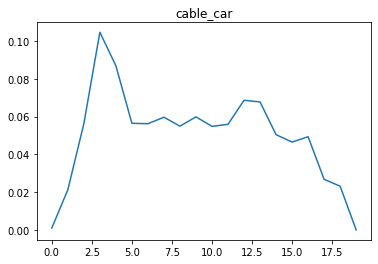

In [22]:
cable_car = hourlytransitPathTraversal[hourlytransitPathTraversal['mode'] == 'cable_car']
cable_car.reset_index(inplace=True)
cable_car['rate'] = cable_car['numPassengers']/ cable_car['numPassengers'].sum()
cable_car['rate'].plot(title='cable_car')

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/1071650402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rail['rate'] = rail['numPassengers']/ rail['numPassengers'].sum()


<AxesSubplot:title={'center':'rail'}>

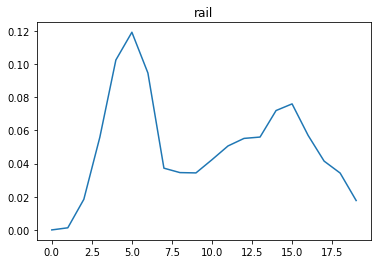

In [23]:
rail = hourlytransitPathTraversal[hourlytransitPathTraversal['mode'] == 'rail']
rail.reset_index(inplace=True)
rail['rate'] = rail['numPassengers']/ rail['numPassengers'].sum()
rail['rate'].plot(title='rail')

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/10214091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway['rate'] = subway['numPassengers']/ subway['numPassengers'].sum()


<AxesSubplot:title={'center':'subway'}>

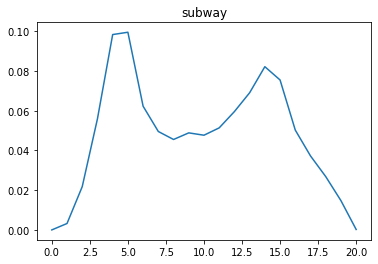

In [24]:
subway = hourlytransitPathTraversal[hourlytransitPathTraversal['mode'] == 'subway']
subway.reset_index(inplace=True)
subway['rate'] = subway['numPassengers']/ subway['numPassengers'].sum()
subway['rate'].plot(title='subway')

/var/folders/z4/5gq1j4sn50b62w40lgwsthh80000gn/T/ipykernel_3479/897021290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tram['rate'] = tram['numPassengers']/ tram['numPassengers'].sum()


<AxesSubplot:title={'center':'tram'}>

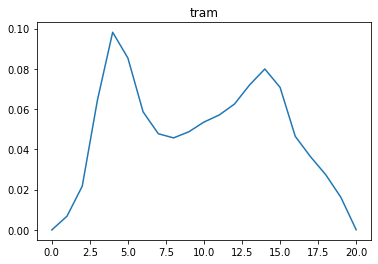

In [25]:
tram = hourlytransitPathTraversal[hourlytransitPathTraversal['mode'] == 'tram']
tram.reset_index(inplace=True)
tram['rate'] = tram['numPassengers']/ tram['numPassengers'].sum()
tram['rate'].plot(title='tram')

In [26]:
transitPathTraversal.groupby('mode').sum().to_csv('out/transitModesShare.csv')

In [27]:
df = transitPathTraversal.groupby('mode').sum()[['numPassengers']]

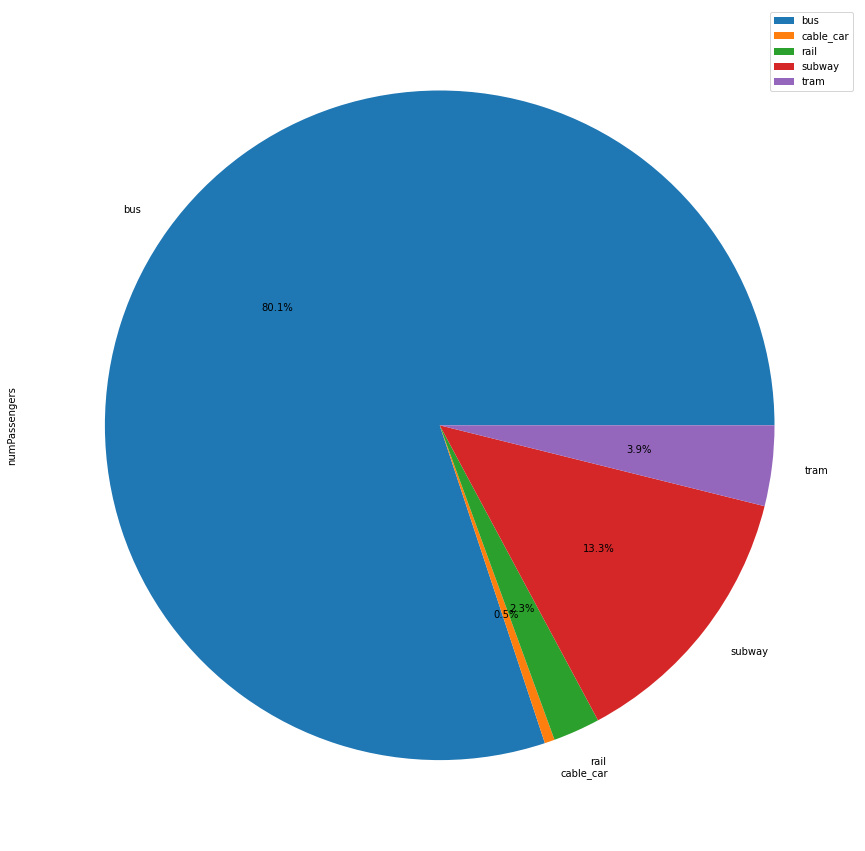

In [28]:
plot = df.plot.pie(y='numPassengers', figsize=(15, 25), autopct='%1.1f%%')